<h1>Accident Severity Rating Prediction</h1><hr><h2>Introduction/Business Problem</h2>

Road safety is a major problem that is often taken lightly. <b>The World Health Organization (WHO)</b> reports that “Approximately 1.35 million people die each year as a result of road traffic crashes”. Many people incur a disability as a result of their injury. Many more lives change either directly or indirectly due to road accidents. The personal injury, emotional and mental health impacts are one side of these unfortunate incidents. But there are economic impacts to the individual, their family and their community as well depending on the nature of the accidents. These impacts are often unforeseen and the relationships associated between these impacts are often forgotten as an aftermath to an unfortunate outcome. It is important to be able to assess the accident severity and the accident severity level to incorporate the human fatality, traffic delay, property damage, or any other type of accident parameters that are involved so that the right level of support can be provided to the affected individuals. For example, this can be a standardized and independent rating – Accident Severity Rating (ASR) that can be shared with insurance providers for them to process insurance claims using a logical and structured approach to assess the claim. This can be used in mandatory driver training programs to focus and share awareness of parameters that contribute to improving road safety (for example, we can determine how much more likely someone is to get into an accident if they are speeding) and further reduce road accidents.

Data such as location, collision type, number of people involved in the accident, number of vehicles involved, incident date, road conditions, weather and whether speeding was a factor may provide great insights when determining the severity level. The objective of this project is to predict the severity level of accidents and determine the major contributing factors to this severity level.

This can be of interest to the road transport safety communities within the government to better understand the contributing factors and the relationships between them in order to introduce targeted awareness campaigns and programs to reduce road safety incidents. This can be of great interest to insurance companies so that they are able to logically assess a claim based on the logically derived severity rating. 

<h2>Data Understanding</h2>
I used the provided data set named Data-Collisions.csv shows data provided for this project from the Seattle Department of Transportation for the period between 1st January 2004 and 20th May 2020. There was a total of 194,673 collision incidents with 37 attributes. However, there were a lot of missing columns (FATALITIES, INJURIES and SERIOUSINJURIES) when compared to the provided metadata as well as additional columns (REPORTNO and STATUS) that were not present in the metadata. The missing columns are very important in determining the severity. Another major deficiency with this data was SEVERITYCODE column only had two values out of a total of five possible values according to metadata. This made me more uncomfortable to choose this data so I tried to find an alternate dataset.
<br>
<br>
Fortunately, Kaggle had a better version of this data set provided also by the Seattle Department of Transportation. There was a total of 221,144 collision incidents with 40 attributes. This had more consistent columns including FATALITIES, INJURIES and SERIOUSINJURIES. This data set also had all possible values for SEVERITYCODE which is important because this is the target variable to predict. 


<h2>Exploratory Data Analysis</h2><h3>Import required libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

<h3>Load collisions data</h3>

In [2]:
dc_df = pd.read_csv("Collisions.csv", low_memory=False)
dc_df.shape

(221266, 40)

In [3]:
dc_df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,...,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,...,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N


In [4]:
dc_df.tail()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
221261,-122.329060,47.605233,221262,318579,320079,E909186,Matched,Block,NaN,6TH AVE BETWEEN CHERRY ST AND COLUMBIA ST,...,Unknown,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
221262,-122.314961,47.523468,221263,318368,319868,3780990,Matched,Block,NaN,14TH AVE S BETWEEN S CONCORD ST AND S HENDERSO...,...,Dry,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
221263,-122.334203,47.575576,221264,318948,320448,E920056,Matched,Intersection,31379.0,1ST AVE S AND S HANFORD ST,...,Dry,Daylight,NaN,NaN,NaN,16,From same direction - one right turn - one str...,0,0,N
221264,-122.310259,47.594214,221265,319956,321456,3795268,Matched,Block,NaN,RAINIER AVE S BETWEEN S CHARLES N ST AND S CHA...,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
221265,-122.342627,47.651619,221266,320317,321817,3810590,Matched,Block,NaN,STONE WAY N BETWEEN N 36TH ST AND N 38TH ST,...,Dry,Daylight,NaN,NaN,NaN,20,One car leaving parked position,0,0,N


In [5]:
dc_df.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,213797.000000,213797.000000,221266.000000,221266.000000,221266.000000,71823.000000,221266.000000,221266.000000,221266.000000,221266.000000,221266.000000,221266.000000,221266.000000,221265.000000,1.272050e+05,221266.000000,2.212660e+05
mean,-122.330752,47.620205,110633.500000,144603.603179,144831.128840,37616.272768,2.226230,0.038103,0.027293,1.728544,0.373844,0.015149,0.001681,13.383558,7.971063e+06,261.441573,9.588454e+03
std,0.030054,0.056040,63874.136669,89039.925169,89413.579421,51905.450406,1.470364,0.201745,0.164345,0.831224,0.732086,0.157908,0.044562,7.302961,2.611523e+06,3248.850406,7.150262e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349280,47.577302,55317.250000,71603.250000,71603.250000,28653.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330348,47.616053,110633.500000,127122.500000,127122.500000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.311998,47.664290,165949.750000,209654.750000,209874.750000,33984.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,221266.000000,333683.000000,335183.000000,757580.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


<h3>Check Data Types</h3>

In [6]:
dc_df.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

<h3>Check value counts to perform analysis on each column</h3>

Here we see that severity is distributed across all options available:

In [7]:
dc_df['SEVERITYDESC'].value_counts()
#dc_df[dc_df['INCDATE']==dc_df['INCDATE'].max()]['INCDTTM']

Property Damage Only Collision    137485
Injury Collision                   58698
Unknown                            21636
Serious Injury Collision            3098
Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

Check min max for the date field to confirm timeline. We see that we have data from Oct 2003 to August 2020 from the Seattle Department of Transportation.

In [8]:
print(dc_df['INCDATE'].max())
print(dc_df['INCDATE'].min())

2020/08/27 00:00:00+00
2003/10/06 00:00:00+00


<h3>Drop irrelevant columns</h3>

In [9]:
dc_df = dc_df.drop(['X', 'Y', 'INTKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYDESC', 'INCDATE', 'INCDTTM', 'SDOT_COLCODE', 'SDOT_COLDESC', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'], axis=1)
dc_df.head(5)

,OBJECTID,INCKEY,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE
0,1,326234,Intersection,2,Pedestrian,2,1,0,1,1,0,0,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN,2
1,2,326246,Intersection,2,Angles,4,0,0,2,2,0,0,At Intersection (intersection related),NaN,N,Raining,Wet,Dark - Street Lights On,NaN,10
2,3,329254,Block,1,Sideswipe,4,0,0,3,0,0,0,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,11
3,4,21200,Intersection,1,Left Turn,2,0,0,2,0,0,0,At Intersection (intersection related),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,28
4,5,17000,Block,0,NaN,0,0,0,0,0,0,0,Mid-Block (but intersection related),NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Rename columns</h3>

In [10]:
dc_df = dc_df.rename(columns={"OBJECTID": "ObjectID", "INCKEY": "IncidentID", "ADDRTYPE": "AddressType", "SEVERITYCODE": "Severity", "COLLISIONTYPE": "CollisionType","PERSONCOUNT": "Person", "PEDCOUNT": "Pedestrian", "PEDCYLCOUNT": "Cyclist", "VEHCOUNT": "Vehicle", "INJURIES": "Injuries", "SERIOUSINJURIES": "SeriousInjuries", "FATALITIES": "Fatalities", "JUNCTIONTYPE": "JunctionType", "INATTENTIONIND": "Inattention", "UNDERINFL": "DUI", "WEATHER": "Weather", "ROADCOND": "RoadCond", "LIGHTCOND": "LightCond", "SPEEDING": "Speeding", "ST_COLCODE": "StateCode" })
dc_df.head(5)

,ObjectID,IncidentID,AddressType,Severity,CollisionType,Person,Pedestrian,Cyclist,Vehicle,Injuries,SeriousInjuries,Fatalities,JunctionType,Inattention,DUI,Weather,RoadCond,LightCond,Speeding,StateCode
0,1,326234,Intersection,2,Pedestrian,2,1,0,1,1,0,0,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN,2
1,2,326246,Intersection,2,Angles,4,0,0,2,2,0,0,At Intersection (intersection related),NaN,N,Raining,Wet,Dark - Street Lights On,NaN,10
2,3,329254,Block,1,Sideswipe,4,0,0,3,0,0,0,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,11
3,4,21200,Intersection,1,Left Turn,2,0,0,2,0,0,0,At Intersection (intersection related),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,28
4,5,17000,Block,0,NaN,0,0,0,0,0,0,0,Mid-Block (but intersection related),NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Check duplicate rows</h3>

No duplicate rows found which is good!

In [11]:
duplicate_rows_df = dc_df[dc_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 20)


In [12]:
dc_df.count()
#s = pd.Series([2,3,np.nan,7,"The Hobbit"])

ObjectID           221266
IncidentID         221266
AddressType        217554
Severity           221265
CollisionType      194767
Person             221266
Pedestrian         221266
Cyclist            221266
Vehicle            221266
Injuries           221266
SeriousInjuries    221266
Fatalities         221266
JunctionType       209299
Inattention         30188
DUI                194787
Weather            194578
RoadCond           194658
LightCond          194490
Speeding             9913
StateCode          211853
dtype: int64

In [13]:
dc_df = dc_df.drop_duplicates()
dc_df.head(5)

,ObjectID,IncidentID,AddressType,Severity,CollisionType,Person,Pedestrian,Cyclist,Vehicle,Injuries,SeriousInjuries,Fatalities,JunctionType,Inattention,DUI,Weather,RoadCond,LightCond,Speeding,StateCode
0,1,326234,Intersection,2,Pedestrian,2,1,0,1,1,0,0,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN,2
1,2,326246,Intersection,2,Angles,4,0,0,2,2,0,0,At Intersection (intersection related),NaN,N,Raining,Wet,Dark - Street Lights On,NaN,10
2,3,329254,Block,1,Sideswipe,4,0,0,3,0,0,0,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN,11
3,4,21200,Intersection,1,Left Turn,2,0,0,2,0,0,0,At Intersection (intersection related),NaN,0,Raining,Wet,Dark - Street Lights On,NaN,28
4,5,17000,Block,0,NaN,0,0,0,0,0,0,0,Mid-Block (but intersection related),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dc_df.shape

(221266, 20)

<h3>Check for missing or null values and perform data wrangling</h3>

In [15]:
print(dc_df.isnull().sum())

ObjectID                0
IncidentID              0
AddressType          3712
Severity                1
CollisionType       26499
Person                  0
Pedestrian              0
Cyclist                 0
Vehicle                 0
Injuries                0
SeriousInjuries         0
Fatalities              0
JunctionType        11967
Inattention        191078
DUI                 26479
Weather             26688
RoadCond            26608
LightCond           26776
Speeding           211353
StateCode            9413
dtype: int64


Check fields with missing or null values and replace them with 0 or others depending on the field

In [16]:
dc_df['Injuries'].value_counts()

0     159355
1      47236
2      10681
3       2728
4        815
5        273
6        100
7         40
8         12
9         10
10         6
11         5
13         2
78         1
15         1
12         1
Name: Injuries, dtype: int64

In [17]:
dc_df['AddressType'] = dc_df['AddressType'].fillna('Others')
dc_df['CollisionType'] = dc_df['CollisionType'].fillna('Other')
dc_df['JunctionType'] = dc_df['JunctionType'].fillna('Unknown')
dc_df['Inattention'] = dc_df['Inattention'].fillna('N')
dc_df['DUI'] = dc_df['DUI'].replace('1','Y')
dc_df['DUI'] = dc_df['DUI'].replace('0','N')
dc_df['DUI'] = dc_df['DUI'].fillna('N')
dc_df['Weather'] = dc_df['Weather'].fillna('Other')
dc_df['Weather'] = dc_df['Weather'].replace('Unknown','Other')
dc_df['RoadCond'] = dc_df['RoadCond'].fillna('Other')
dc_df['LightCond'] = dc_df['LightCond'].replace('Unknown','Other')
dc_df['LightCond'] = dc_df['LightCond'].fillna('Other')
dc_df['Speeding'] = dc_df['Speeding'].fillna('N')
dc_df['Severity'] = dc_df['Severity'].fillna('0')

#Lets make the target variable a number rather than a string..
dc_df['Severity'] = dc_df['Severity'].replace('2b','4')
dc_df['Severity'] = dc_df['Severity'].astype(int)

In [18]:
print(dc_df.isnull().sum())

ObjectID              0
IncidentID            0
AddressType           0
Severity              0
CollisionType         0
Person                0
Pedestrian            0
Cyclist               0
Vehicle               0
Injuries              0
SeriousInjuries       0
Fatalities            0
JunctionType          0
Inattention           0
DUI                   0
Weather               0
RoadCond              0
LightCond             0
Speeding              0
StateCode          9413
dtype: int64


For StateCode, since 0 stands for "Vehicle Going Straight Hits Pedastrian" we cannot replace the null values with 0. I would rather remove these lines from the dataset altogether.

In [19]:
dc_df = dc_df[~dc_df['StateCode'].isnull()]

In [20]:
dc_df.shape

(211853, 20)

<h3>Encode the string fields</h3>

In [21]:
from sklearn import preprocessing
addrtype = preprocessing.LabelEncoder()
addrtype.fit(['Intersection','Block','Alley','Others'])
dc_df['AddressType'] = addrtype.transform(dc_df['AddressType'])

In [22]:
from sklearn import preprocessing
CollisionType = preprocessing.LabelEncoder()
CollisionType.fit(['Parked Car','Other','Angles','Rear Ended','Sideswipe','Left Turn','Pedestrian','Cycles','Right Turn','Head On'])
dc_df['CollisionType'] = CollisionType.transform(dc_df['CollisionType'])

In [23]:
from sklearn import preprocessing
JunctionType = preprocessing.LabelEncoder()
JunctionType.fit(['Mid-Block (not related to intersection)','At Intersection (intersection related)','Mid-Block (but intersection related)','Driveway Junction','Unknown','At Intersection (but not related to intersection)','Ramp Junction'])
dc_df['JunctionType'] = JunctionType.transform(dc_df['JunctionType'])

In [24]:
from sklearn import preprocessing
Inattention = preprocessing.LabelEncoder()
Inattention.fit(['N','Y'])
dc_df['Inattention'] = Inattention.transform(dc_df['Inattention'])

In [25]:
from sklearn import preprocessing
DUI = preprocessing.LabelEncoder()
DUI.fit(['N','Y'])
dc_df['DUI'] = DUI.transform(dc_df['DUI'])

In [26]:
from sklearn import preprocessing
Weather = preprocessing.LabelEncoder()
Weather.fit(['Clear','Raining','Other','Overcast','Snowing','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy','Blowing Snow'])
dc_df['Weather'] = Weather.transform(dc_df['Weather'])

It's interesting to note that most incidents occured during "Clear" weather. After this "Raining", "Other" and "Overcast" weather occuring the most after this when an incident took place.

In [27]:
from sklearn import preprocessing
LightCond = preprocessing.LabelEncoder()
LightCond.fit(['Daylight','Dark - Street Lights On','Other','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting'])
dc_df['LightCond'] = LightCond.transform(dc_df['LightCond'])

Most incidents occured during daylight conditions followed by dark conditions.

In [28]:
from sklearn import preprocessing
RoadCond = preprocessing.LabelEncoder()
RoadCond.fit(['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'])
dc_df['RoadCond'] = RoadCond.transform(dc_df['RoadCond'])

In [29]:
from sklearn import preprocessing
Speeding = preprocessing.LabelEncoder()
Speeding.fit(['N','Y'])
dc_df['Speeding'] = Speeding.transform(dc_df['Speeding'])

In [30]:
dc_df.dtypes

ObjectID            int64
IncidentID          int64
AddressType         int64
Severity            int64
CollisionType       int64
Person              int64
Pedestrian          int64
Cyclist             int64
Vehicle             int64
Injuries            int64
SeriousInjuries     int64
Fatalities          int64
JunctionType        int64
Inattention         int64
DUI                 int64
Weather             int64
RoadCond            int64
LightCond           int64
Speeding            int64
StateCode          object
dtype: object

In [31]:
dc_df = dc_df[dc_df['StateCode']!=" "]

In [32]:
dc_df['StateCode'] = pd.to_numeric(dc_df['StateCode'])

In [33]:
dc_df.dtypes

ObjectID           int64
IncidentID         int64
AddressType        int64
Severity           int64
CollisionType      int64
Person             int64
Pedestrian         int64
Cyclist            int64
Vehicle            int64
Injuries           int64
SeriousInjuries    int64
Fatalities         int64
JunctionType       int64
Inattention        int64
DUI                int64
Weather            int64
RoadCond           int64
LightCond          int64
Speeding           int64
StateCode          int64
dtype: object

Lets remove the empty StateCode records.

<h3>Analyze Outliers</h3>

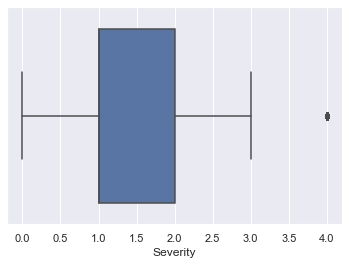

In [34]:
sns.boxplot(x=dc_df['Severity'])

I like how the target variable severity is distributed across all possible values!

<h3>Trying to look at relationships between features</h3>


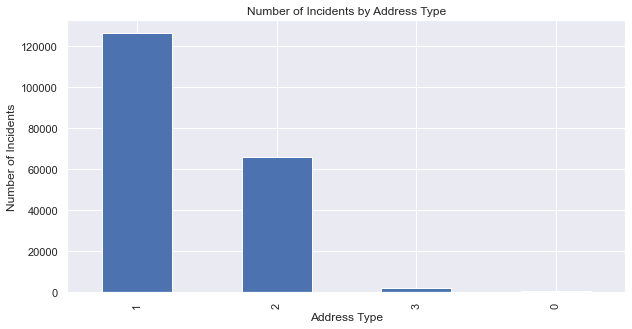

In [35]:
dc_df['AddressType'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of Incidents by Address Type")
plt.ylabel('Number of Incidents')
plt.xlabel('Address Type');

Most accidents occurred near a block as opposed to other types of locations. I would expect most to occur in an intersection but depends on how many intersections are in the city of Seattle.

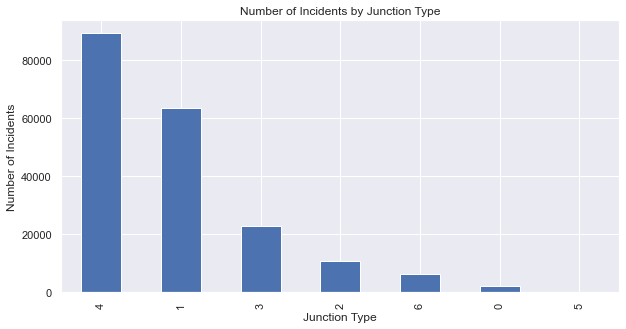

In [36]:
dc_df['JunctionType'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of Incidents by Junction Type")
plt.ylabel('Number of Incidents')
plt.xlabel('Junction Type');

Most incidents occurred Mid-Block and were not related to being near an intersection - this correlates with the bar chart on top of this one that looked at the address types.

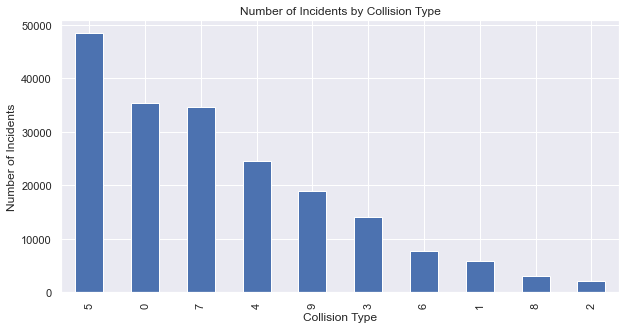

In [37]:
dc_df['CollisionType'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Number of Incidents by Collision Type")
plt.ylabel('Number of Incidents')
plt.xlabel('Collision Type');

Most collisions occured while parked. Angles and Rear Ended collisions are almost as high - slightly lower. Head On collisions were a handful which makes sense.

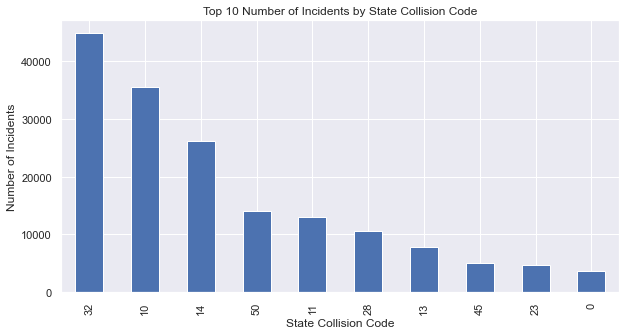

In [38]:
dc_df['StateCode'].value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Number of Incidents by State Collision Code")
plt.ylabel('Number of Incidents')
plt.xlabel('State Collision Code');

The top three collision codes correspond to "One Parked - One Moving", "Entering At Angle" and "From Same Direction - Both Going Straight - One Stopped - Rear End". These correspond with the incidents by collision type histogram shown above.

,AddressType,Severity,CollisionType,Person,Pedestrian,Cyclist,Vehicle,Injuries,SeriousInjuries,Fatalities,JunctionType,Inattention,DUI,Weather,RoadCond,LightCond,Speeding,StateCode
AddressType,1.000000,0.161455,-0.436287,0.051926,0.130873,0.077233,-0.082721,0.144270,0.028749,0.006000,-0.773973,-0.079754,-0.045332,0.007311,-0.007547,-0.003790,-0.061149,-0.188476
Severity,0.161455,1.000000,-0.120438,0.110016,0.289696,0.214269,-0.114963,0.734238,0.471356,0.114833,-0.199354,0.026219,0.068537,-0.012943,-0.050481,-0.051454,0.058919,-0.140445
CollisionType,-0.436287,-0.120438,1.000000,0.012575,0.098491,-0.220173,0.103544,-0.117455,-0.025899,-0.002509,0.450621,0.118211,0.002826,-0.012091,0.000976,0.026510,-0.005292,0.041497
Person,0.051926,0.110016,0.012575,1.000000,-0.021339,-0.040847,0.401005,0.278656,0.104945,0.046329,-0.086967,0.070988,0.022579,-0.006545,-0.031146,-0.027544,-0.002358,-0.211446
Pedestrian,0.130873,0.289696,0.098491,-0.021339,1.000000,-0.020107,-0.324438,0.159664,0.130511,0.073177,-0.129898,-0.009305,0.026636,0.017638,0.003268,-0.042029,-0.032897,-0.279632
Cyclist,0.077233,0.214269,-0.220173,-0.040847,-0.020107,1.000000,-0.308090,0.114990,0.060223,0.010558,-0.092346,0.001274,-0.017457,-0.044667,-0.052754,0.019612,-0.022675,0.199379
Vehicle,-0.082721,-0.114963,0.103544,0.401005,-0.324438,-0.308090,1.000000,0.027026,-0.046865,-0.029426,0.077759,0.049921,-0.015010,-0.015890,-0.015072,0.040694,-0.047570,-0.230574
Injuries,0.144270,0.734238,-0.117455,0.278656,0.159664,0.114990,0.027026,1.000000,0.279709,0.067250,-0.181825,0.035997,0.052530,-0.008864,-0.043072,-0.040846,0.053074,-0.149511
SeriousInjuries,0.028749,0.471356,-0.025899,0.104945,0.130511,0.060223,-0.046865,0.279709,1.000000,0.174990,-0.030174,-0.011828,0.044703,-0.008491,-0.014751,-0.023874,0.038968,-0.011406
Fatalities,0.006000,0.114833,-0.002509,0.046329,0.073177,0.010558,-0.029426,0.067250,0.174990,1.000000,-0.005401,-0.012086,0.043009,-0.005564,-0.010260,-0.016599,0.042159,0.000629


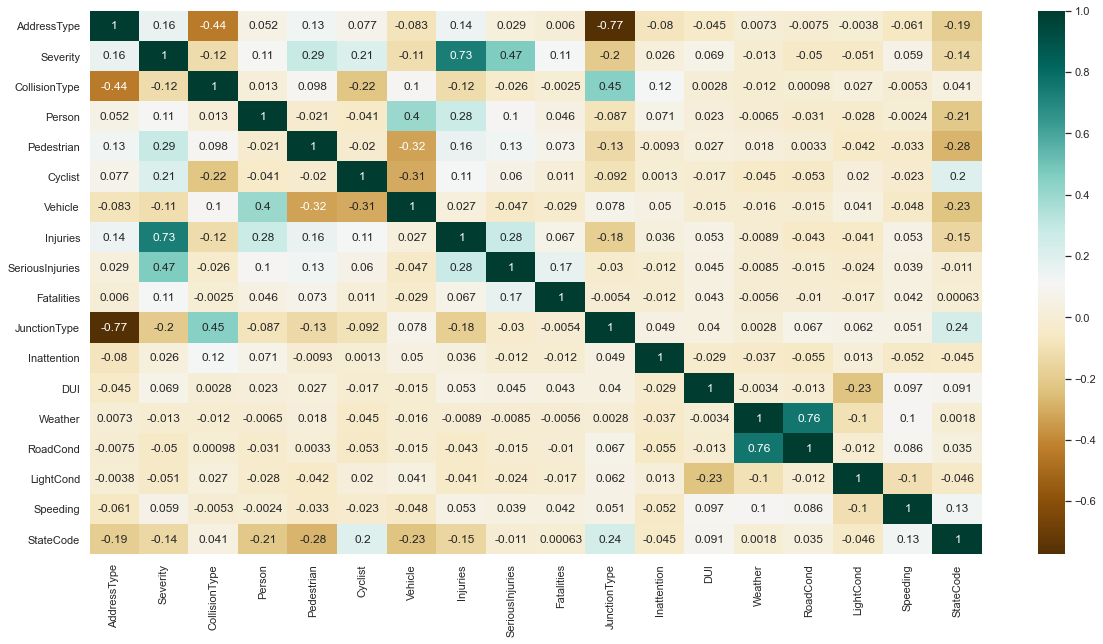

In [39]:
plt.figure(figsize=(20,10))
c = dc_df.iloc[:,2:].corr()
sns.heatmap(c, cmap="BrBG",annot=True)
c

We can see from the above that Severity is the dependent variable that is related to Injuries, but not Serious Injuries and Fatalities. This may not make sense at first because you would expect fatalities and serious injuries to have an effect on Severity. But since the number of fatalities and serious injuries that are > 0 are very low it makes sense that Severity is only heavily influenced by injuries alone. Since injuries (minor injuries) are the most commonly occuring incident.

Severity is also dependent on number of Vehicles, Persons, Pedestrians and Cyclists involved in an incident. 

The next best correlation is between number of persons involved in an incident and the no. of vehicles involved. This could be because there is most likely one person per vehicle involved in an incident. 

There appears to be one incident that had greater than 70 injuries. Lets remove this outlier.

In [40]:
dc_df = dc_df[dc_df['Injuries']<70]

Lets see how Severity and Injuries are related.

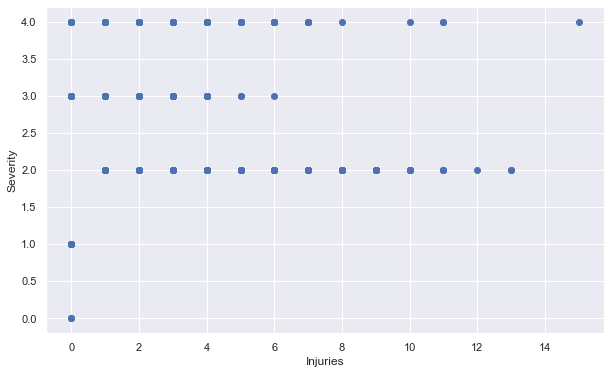

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(dc_df['Injuries'], dc_df['Severity'])
ax.set_xlabel('Injuries')
ax.set_ylabel('Severity')
plt.show()

Severity appears to be a step function of the number of Injuries that averages around 2.5 Severity. Could be a linear regression model with y = 2.5 approximately based on the above plot.

Lets now look at the relationship between number of vehicles and the number of persons involved in an incident.

<h2>Modeling & Evaluation</h2>

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, accuracy_score, f1_score, r2_score, confusion_matrix, classification_report, jaccard_score, log_loss

<h3>Normalize the data</h3>

In [46]:
X = dc_df[['AddressType','CollisionType','Person','Pedestrian','Cyclist','Vehicle','JunctionType', 'Inattention', 'DUI', 'Weather', 'RoadCond', 'LightCond', 'Speeding']].values
#X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X=normalize(X)
y = dc_df['Severity'].values
y[0:5]
y.max()

4

In [47]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
X_test.shape

(58430, 13)

<i>I decided to drop the Injuries, SeriousInjuries and Fatalities features in order to predict the target variable Severity. This is because there is a high degree of correlation between Injuries and Severity as seen from the correlation matrix above. I dropped SeriousInjuries and Fatalities as well since most of the incidents are zeroes for these features.</i>

<h3>1. K-Nearest Neighbors (KNN) Model</h3>

<h4>Find Best K for the KNN Model</h4>

In [88]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.62425124, 0.71586514, 0.68062639, 0.72322437, 0.71754236,
       0.72587712, 0.72685264, 0.72976211, 0.7286839 ])

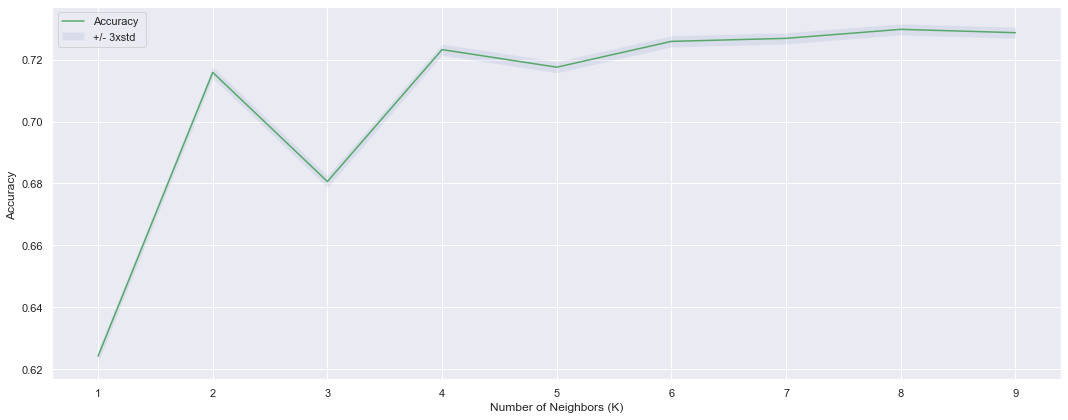

In [89]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

So, lets set K to the most accurate one found, K = 8.

In [90]:
k = 8
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=8)

In [91]:
yhat = neigh.predict(X_test)
yhat[0:100]

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1])

<h4>Evaluation</h4>

In [92]:
print("Accuracy score: %.2f" % accuracy_score(y_test, yhat) )
print("Jaccard score: %.2f" % jaccard_score(y_test, yhat, average='weighted') )
print("F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

Accuracy score: 0.73
Jaccard score: 0.57
F1-score: 0.70


In [94]:
print('Classification Report:')
print (classification_report(y_test, yhat))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.76      0.91      0.83     40135
           2       0.59      0.36      0.45     17285
           3       0.00      0.00      0.00        97
           4       0.25      0.00      0.01       911

    accuracy                           0.73     58430
   macro avg       0.32      0.25      0.26     58430
weighted avg       0.70      0.73      0.70     58430



<h2>2. Decision Tree Model</h2>

In [48]:
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

<h4>Evaluation</h4>

In [52]:
yhat_dt = DT_model.predict(X_test)
print("Accuracy score: %.2f" % accuracy_score(y_test, yhat_dt) )
print("Jaccard index: %.2f" % jaccard_score(y_test, yhat_dt, average='weighted'))
print("F1-score: %.2f" % f1_score(y_test, yhat_dt, average='weighted') )

Accuracy score: 0.74
Jaccard index: 0.57
F1-score: 0.69


In [51]:
print('Classification Report:')
print (classification_report(y_test, yhat_dt))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      0.96      0.84     40135
           2       0.70      0.27      0.39     17285
           3       0.00      0.00      0.00        97
           4       0.28      0.01      0.02       911

    accuracy                           0.74     58430
   macro avg       0.34      0.25      0.25     58430
weighted avg       0.72      0.74      0.69     58430



<h2>3. Logistic Regression</h2>

In [53]:
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01)

In [54]:
yhat_lr = LR_model.predict(X_test)

<h4>Evaluation</h4>

In [55]:
print("Accuracy score: %.2f" % accuracy_score(y_test, yhat_lr) )
print("Jaccard index: %.2f" % jaccard_score(y_test, yhat_lr, average='weighted'))
print("F1-score: %.2f" % f1_score(y_test, yhat_lr, average='weighted') )

Accuracy score: 0.71
Jaccard index: 0.52
F1-score: 0.64


In [56]:
print('Classification Report:')
print (classification_report(y_test, yhat_lr))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.74      0.97      0.84     40135
           2       0.72      0.24      0.36     17285
           3       0.00      0.00      0.00        97
           4       0.56      0.01      0.01       911

    accuracy                           0.74     58430
   macro avg       0.40      0.24      0.24     58430
weighted avg       0.73      0.74      0.68     58430



<h2>4. Support Vector Machine Model</h2>

For this model, I restricted the data size to 50,000 for the training set and 20% of that which is 10,000 records for the test set. This is because SVM was very slow with record size greater than 50k on my laptop.

In [56]:
SVM_model = svm.SVC(cache_size=7000)
SVM_model.fit(X_train[:50000], y_train[:50000]) 

SVC(cache_size=7000)

In [57]:
yhat_svm = SVM_model.predict(X_test[:10000])
yhat_svm

array([1, 1, 1, ..., 1, 1, 1])

<h4>Evaluation</h4>

In [58]:
print("Accuracy score: %.2f" % accuracy_score(y_test[:10000], yhat_svm) )
print("Jaccard index: %.2f" % jaccard_score(y_test[:10000], yhat_svm, average='weighted'))
print("F1-score: %.2f" % f1_score(y_test[:10000], yhat_svm, average='weighted') )

Accuracy score: 0.74
Jaccard index: 0.56
F1-score: 0.68


In [61]:
print('Classification Report:')
print (classification_report(y_test[:10000], yhat_svm))

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.97      0.85      6958
           2       0.72      0.24      0.37      2879
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00       149

    accuracy                           0.75     10000
   macro avg       0.37      0.30      0.30     10000
weighted avg       0.73      0.75      0.69     10000



<h2>Results</h2>

| Algorithm          | Accuracy |Jaccard | F1-score |
|--------------------|----------|--------|----------|
| KNN                |   0.73   |  0.57  |   0.70   |
| Decision Tree      |   0.74   |  0.57  |   0.69   |
| SVM                |   0.74   |  0.56  |   0.68   |
| LogisticRegression |   0.71   |  0.52  |   0.64   |

All of the models have similar scores sith a F1-score of around 70%. Accuracy is around 75% for out of sample test set.

<h2>XGBoost Model</h2>

In [59]:
import xgboost as xgb

In [60]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [61]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)

In [62]:
xg_reg.fit(X_train,y_train)
yhat_xg = xg_reg.predict(X_test)

[22:30:11] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[22:30:11] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


<h4>Evaluation</h4>

In [63]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_xg))
print("RMSE: %f" % (rmse))

RMSE: 0.610540


The error is very small so XGBoost algorithm seems to be doing a good job with this data set.

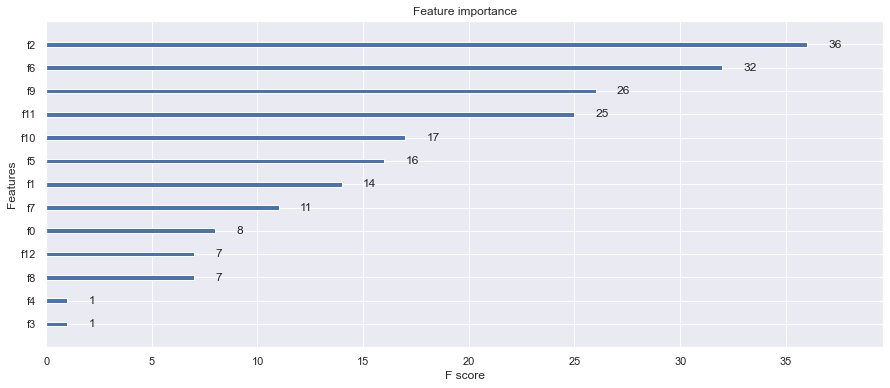

In [67]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 6]
plt.show()

As can be seen above the feature with the most important is the Junction Type and the Number of Persons involved in an incident.

<h2>Conclusion</h2>

<b>XGBoost</b> seems to be performing well for this problem. Next to this I like the <b>Decision Tree</b> model because it is able to predict almost all types of Severity ratings compared to the rest of the models. This is important especially due to the enormous emphasis on the "1" rating for Severity.

In [74]:
X_train, X_test, y_train, y_test = train_test_split( normalize(X), y, test_size=0.3, random_state=4)
X_test.shape

(58430, 13)

In [75]:
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)

# fit the model with data
LR_model.fit(X_train,y_train)

y_pred=LR_model.predict(X_test)

In [76]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[    0,     1,     1,     0,     0],
       [    0, 38961,  1174,     0,     0],
       [    0, 13171,  4114,     0,     0],
       [    0,    39,    58,     0,     0],
       [    0,   485,   426,     0,     0]])

Text(0.5, 30.5, 'Predicted label')

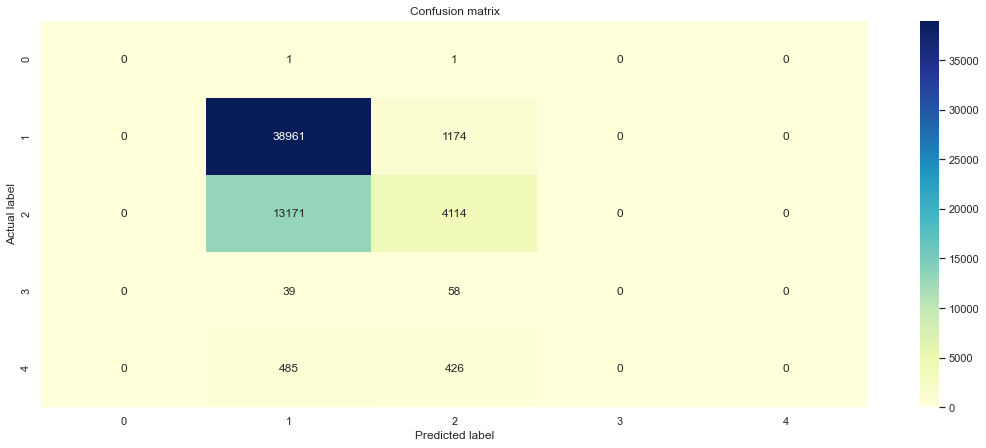

In [77]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [78]:
print("Accuracy score: %.2f" % accuracy_score(y_test, y_pred) )
print("Jaccard index: %.2f" % jaccard_score(y_test, y_pred, average='weighted'))
print("F1-score: %.2f" % f1_score(y_test, y_pred, average='weighted') )

Accuracy score: 0.74
Jaccard index: 0.56
F1-score: 0.68


<h2>Logistic Regression - Evaluation</h2>

In [79]:
y_pred_proba = LR_model.predict_proba(X_test)[::,1]
y_pred_proba

array([0.21411232, 0.11631492, 0.20275616, ..., 0.14509664, 0.3027433 ,
       0.1538429 ])

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import normalize


# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4])
n_classes = y.shape[1]

X1 = X

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(LogisticRegression(C=0.01))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

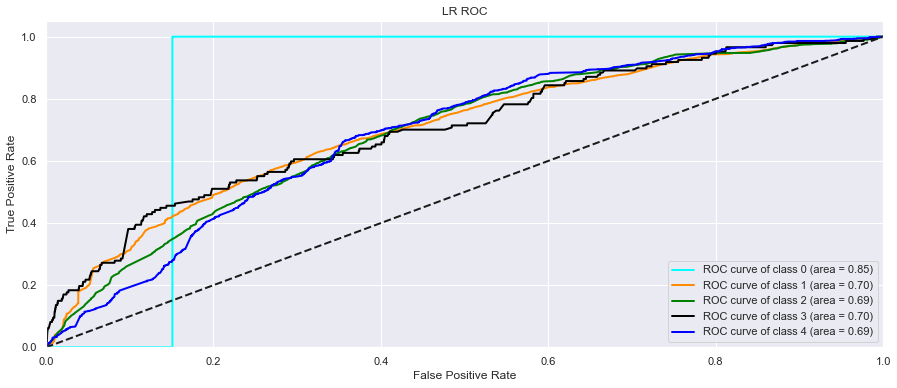

In [126]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
#plt.plot(fpr["micro"], tpr["micro"],
#         label='micro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["micro"]),
#         color='deeppink', linestyle=':', linewidth=4)

#plt.plot(fpr["macro"], tpr["macro"],
#         label='macro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["macro"]),
#         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'green', 'black', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR ROC')
plt.legend(loc="lower right")
plt.show()

<h2>KNN - Evaluation</h2>

In [131]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4])
n_classes = y.shape[1]

X1 = X

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors = 8))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

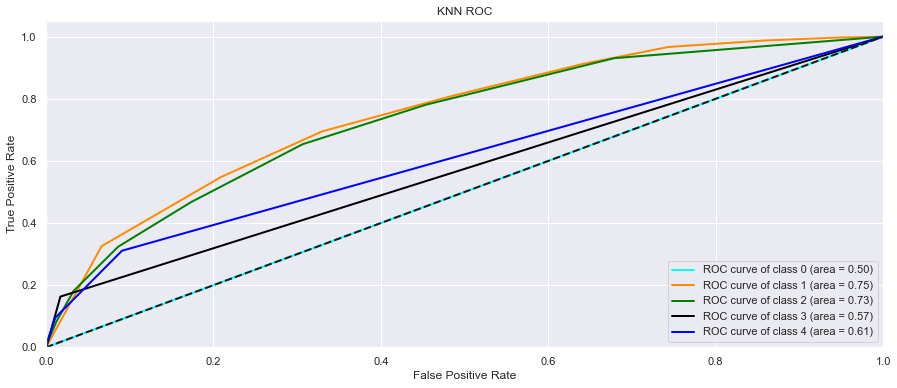

In [132]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
#plt.plot(fpr["micro"], tpr["micro"],
#         label='micro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["micro"]),
#         color='deeppink', linestyle=':', linewidth=4)

#plt.plot(fpr["macro"], tpr["macro"],
#         label='macro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["macro"]),
#         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'green', 'black', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC')
plt.legend(loc="lower right")
plt.show()

<h2>Decision Tree - Evaluation</h2>

In [134]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4])
n_classes = y.shape[1]

X1 = X

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=.5, random_state=0)
                 
# Learn to predict each class against the other
classifier = OneVsRestClassifier(DecisionTreeClassifier(criterion="entropy", max_depth = 10))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

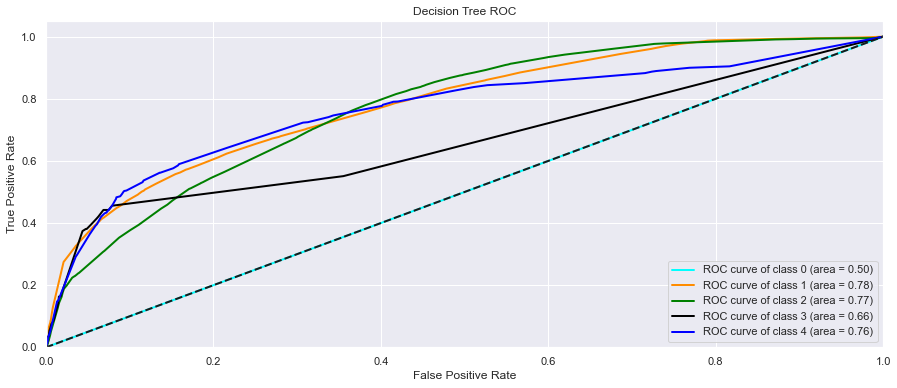

In [135]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
#plt.plot(fpr["micro"], tpr["micro"],
#         label='micro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["micro"]),
#         color='deeppink', linestyle=':', linewidth=4)

#plt.plot(fpr["macro"], tpr["macro"],
#         label='macro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["macro"]),
#         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'green', 'black', 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC')
plt.legend(loc="lower right")
plt.show()

<hr>